Another source for high-dimensional data comes from finance.



## Load real world data



Let&rsquo;s load some stock prices.



In [13]:
import os, json
files = [f for f in os.listdir('/Users/neutrino/Desktop/Python_bootcamp/data-bootcamp/week3/stocks') if f.endswith('.json')]

data = {}
symbols = []
for name in files:
    with open(os.path.join('/Users/neutrino/Desktop/Python_bootcamp/data-bootcamp/week3/stocks/', name),'r') as f:
        d = json.load(f)
        symbol = d['Meta Data']['2. Symbol']
        symbols.append( symbol )
        data[ symbol ] = d['Time Series (Daily)']

Convert it to a `pandas` data frame.



In [14]:
import pandas as pd

market = pd.DataFrame(columns=['date'])

for symbol in data.keys():
    dates = pd.DataFrame( pd.to_datetime( list(data[symbol].keys()) ), columns=['date'] )
    closes = pd.DataFrame( [float(x['5. adjusted close']) for x in data[symbol].values()], columns=[symbol] )
    df = pd.DataFrame( pd.concat( [dates, closes], axis=1 ) )
    market = market.merge( df, how='outer' )

## Make a plot



Let&rsquo;s &ldquo;wrangle&rdquo; this data into our desired format.



In [15]:
import numpy as np
prices = market.drop('date',axis=1)
symbols = list(prices.columns)
X = np.array([prices[s] for s in symbols])
print(X.shape)

(9, 100)


This is much too high-dimensional for us to plot.  Let&rsquo;s do some
unsupervised dimensionality reduction.  Let&rsquo;s first normalize
everything.



In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X.transpose())
X2 = ss.transform(X.transpose())
X2 = X2.transpose()

Then we&rsquo;ll perform PCA.



In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)  
X3 = pca.transform(X2)

Plot it!



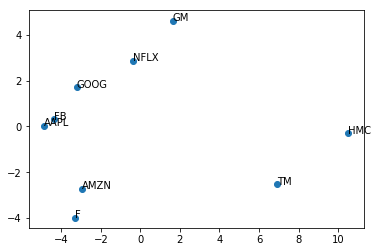

In [20]:
import matplotlib.pyplot as plt
plt.scatter( X3[:,0], X3[:,1] )
for i, w in enumerate(symbols):
    plt.text( X3[i,0], X3[i,1], w )
plt.show()

It looks Facebook and Apple are similar.



In [ ]:
import matplotlib.pyplot as plt
plt.scatter( prices['FB'], prices['AAPL'] )
plt.show()

Compare Toyota to Google.



In [ ]:
import matplotlib.pyplot as plt
plt.scatter( prices['TM'], prices['GOOG'] )
plt.show()

Dig further into this data.

